# 电子游戏销售分析
陈雨馨  3120190981  数据集：Video Game Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("E:/DataMining/hw3/vgsales.csv")

In [2]:
data = data.drop_duplicates()
data = data.dropna()
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 电子游戏市场分析

In [3]:
def stans(num):
    print("number of classes:", len(num))
    print("the top 10 classes:\n", num[0:10])
    num[0:10].plot(kind="bar", figsize=(20,9))
    return

### 最受欢迎的电子游戏 top10

number of classes: 11325
the top 10 classes:
 Need for Speed: Most Wanted                12
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
LEGO Star Wars II: The Original Trilogy     8
Lego Batman 3: Beyond Gotham                8
Cars                                        8
FIFA 15                                     8
LEGO The Hobbit                             8
Monopoly                                    8
Name: Name, dtype: int64


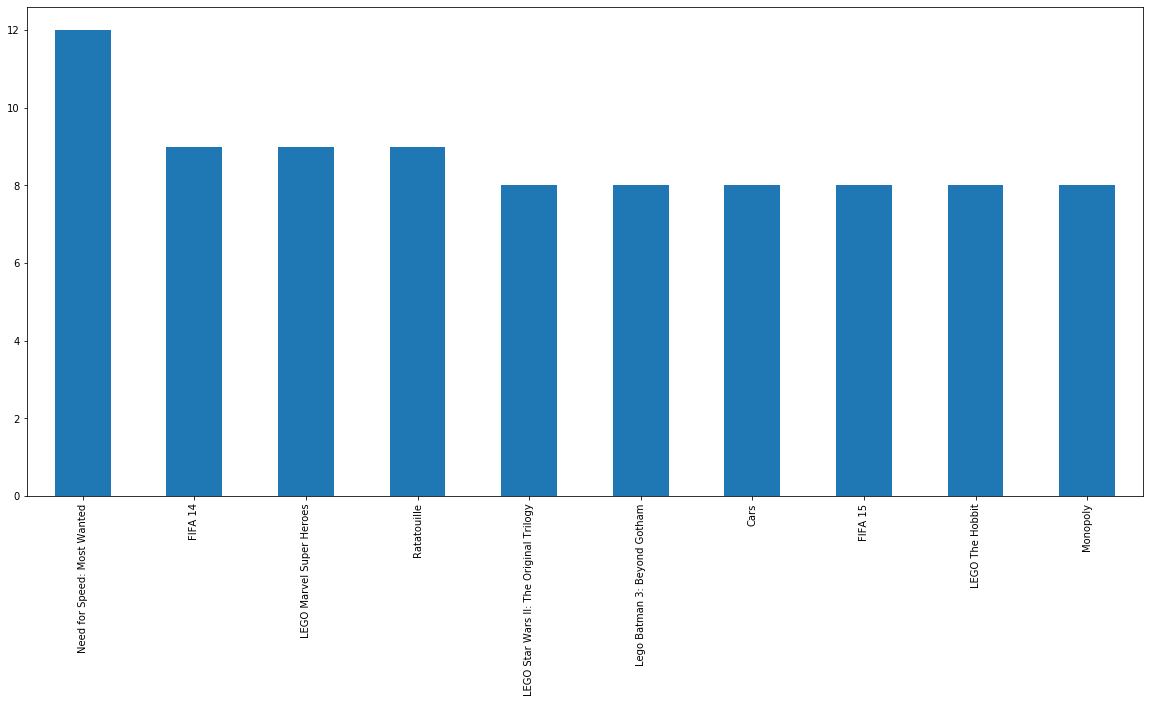

In [4]:
name = data["Name"].value_counts()
stans(name)

### 最受欢迎的游戏平台 top10

number of classes: 31
the top 10 classes:
 DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64


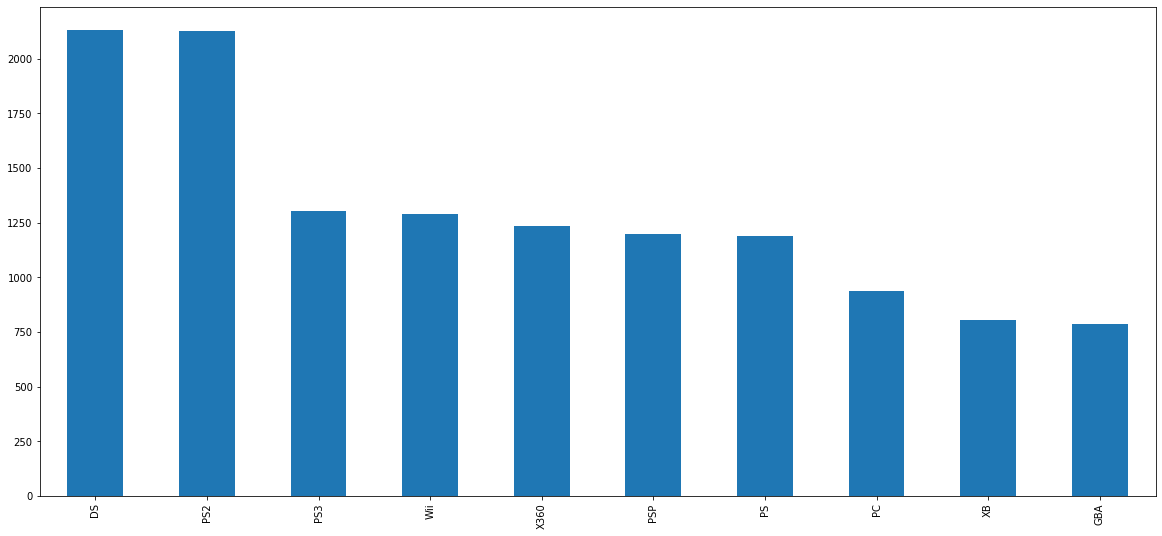

In [5]:
platform = data["Platform"].value_counts()
stans(platform)

### 最受欢迎的游戏类别 top10

number of classes: 12
the top 10 classes:
 Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Name: Genre, dtype: int64


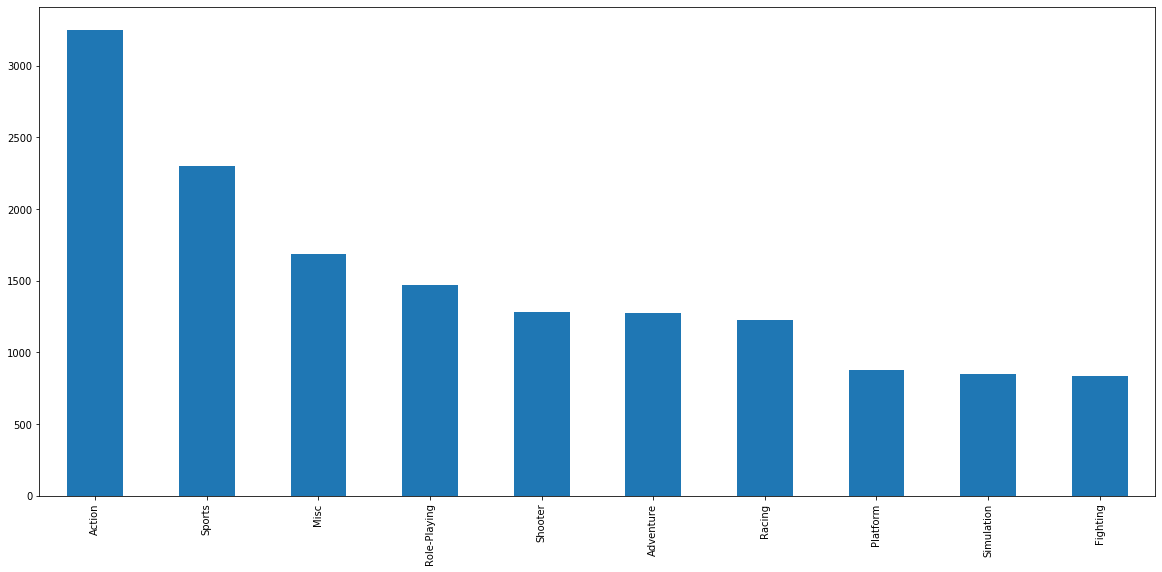

In [6]:
genre = data["Genre"].value_counts()
stans(genre)

### 最受欢迎的游戏出版商 top10

number of classes: 576
the top 10 classes:
 Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64


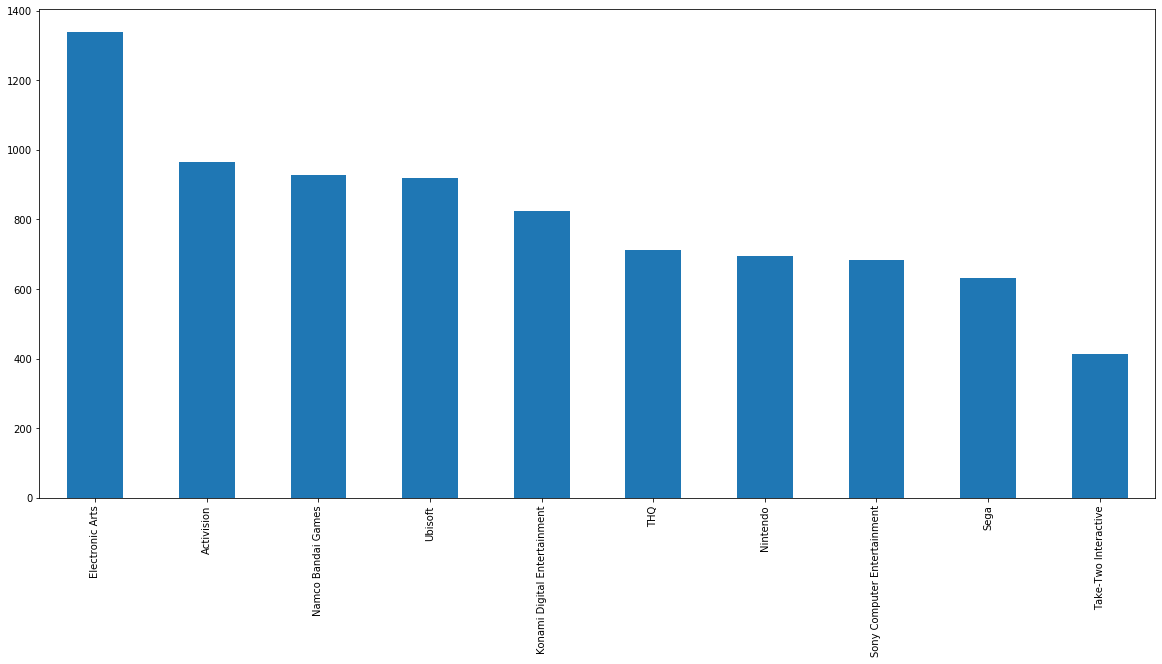

In [7]:
publisher = data["Publisher"].value_counts()
stans(publisher)

## 电子游戏销售额预测

In [8]:
saledf = pd.DataFrame({'Year': range(38), 'NA_Sales': range(38), 'EU_Sales': range(38), 'JP_Sales': range(38), 'Other_Sales': range(38), 'Global_Sales': range(38)}).astype('float')
for i in range(1980, 2018):
    df=data[data['Year'].isin([i])]
    saledf['Year'][i-1980] = i
    saledf['NA_Sales'][i-1980] = df['NA_Sales'].sum()
    saledf['EU_Sales'][i-1980] = df['EU_Sales'].sum()
    saledf['JP_Sales'][i-1980] = df['JP_Sales'].sum()
    saledf['Other_Sales'][i-1980] = df['Other_Sales'].sum()
    saledf['Global_Sales'][i-1980] = df['Global_Sales'].sum()
saledf

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


### 美国地区电子游戏每年的销售额走势

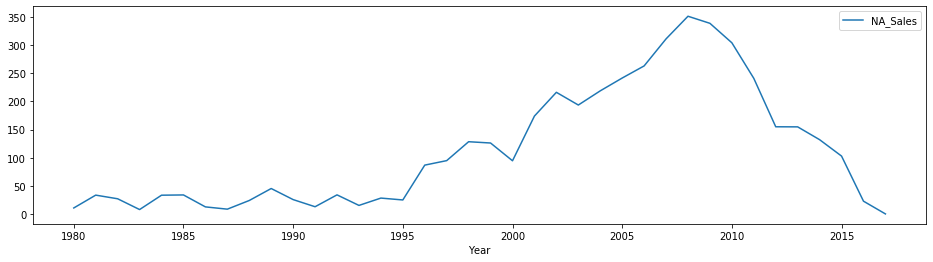

In [9]:
saledf[['Year','NA_Sales']].plot(x='Year',y='NA_Sales',figsize=(16,4))

### 欧洲地区电子游戏每年的销售额走势

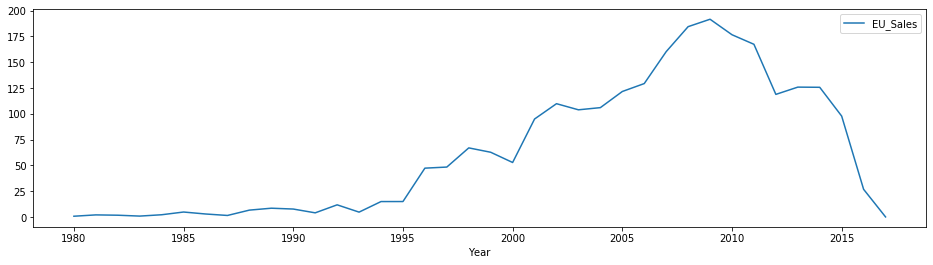

In [10]:
saledf[['Year','EU_Sales']].plot(x='Year',y='EU_Sales',figsize=(16,4))

### 日本地区电子游戏每年的销售额走势

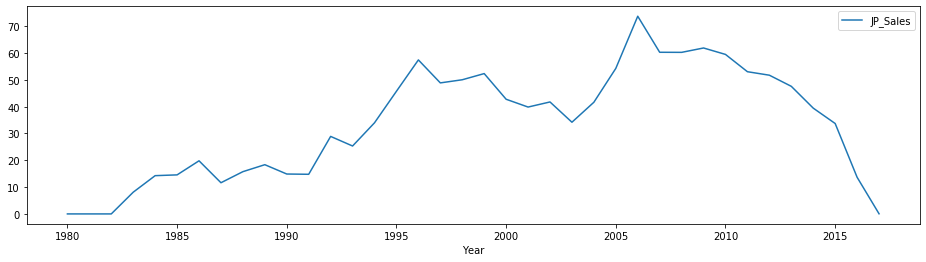

In [11]:
saledf[['Year','JP_Sales']].plot(x='Year',y='JP_Sales',figsize=(16,4))

### 其他地区电子游戏每年的销售额走势

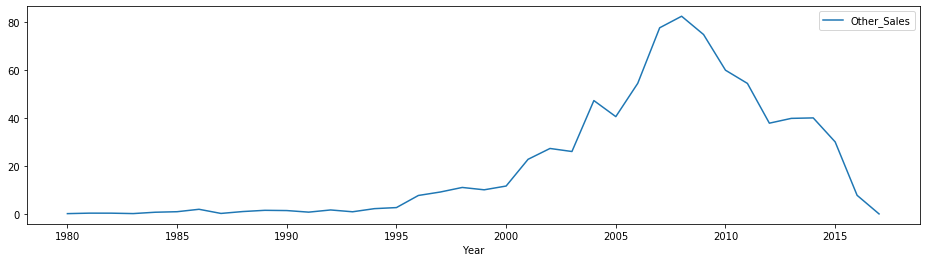

In [12]:
saledf[['Year','Other_Sales']].plot(x='Year',y='Other_Sales',figsize=(16,4))

### 全球电子游戏每年的销售额走势

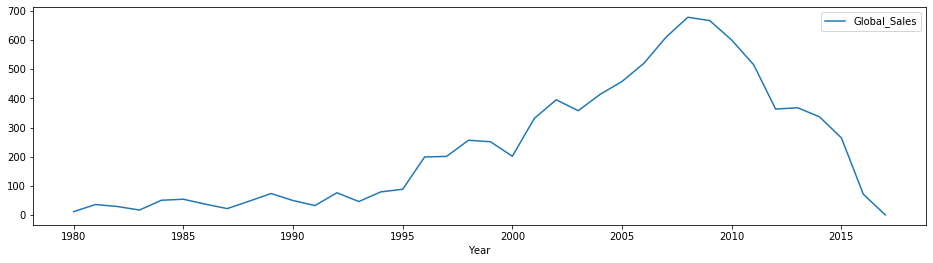

In [13]:
saledf[['Year','Global_Sales']].plot(x='Year',y='Global_Sales',figsize=(16,4))

In [14]:
def sales_predict(X, y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=666)
    standardscaler = StandardScaler()
    standardscaler.fit(X_train)
    X_train_std = standardscaler.transform(X_train)
    X_test_std = standardscaler.transform(X_test)
    KNN_reg = KNeighborsRegressor()
    KNN_reg.fit(X_train_std, y_train)
    y_pred = KNN_reg.predict(X_test_std)
    print("均方差MSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2决定系数: ", r2_score(y_test, y_pred))
    x = np.arange(1, len(y_pred)+1)
    Pplot = plt.scatter(x, y_pred)
    Tplot = plt.scatter(x, y_test)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred','y_test'])
    plt.show()
    saleyear = pd.DataFrame({'Year':[2025]})
    print("预测2025年销售额为 ", KNN_reg.predict(saleyear))
    return

### 对美国地区电子游戏销售额的预测性能及2025年销售额预测值

均方差MSE:  69.45608883796054
R2决定系数:  0.44165057395551843


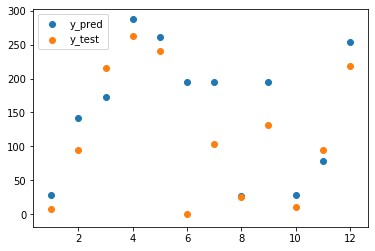

预测2025年销售额为  [[195.09]]


In [15]:
X = saledf[['Year']]
y = saledf[['NA_Sales']]
sales_predict(X, y)

### 对欧洲地区电子游戏销售额的预测性能及2025年销售额预测值

均方差MSE:  40.35996991657286
R2决定系数:  0.49699672863247424


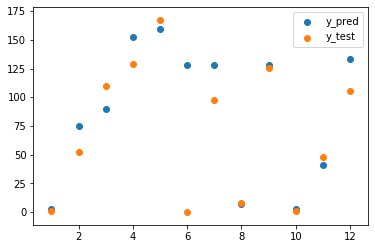

预测2025年销售额为  [[127.896]]


In [16]:
X = saledf[['Year']]
y = saledf[['EU_Sales']]
sales_predict(X, y)

### 对日本地区电子游戏销售额的预测性能及2025年销售额预测值

均方差MSE:  15.930366735682307
R2决定系数:  0.4680068804864077


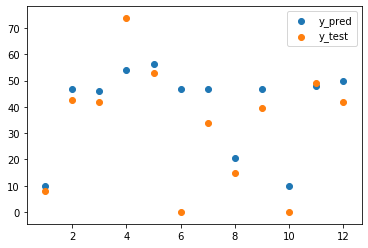

预测2025年销售额为  [[46.876]]


In [17]:
X = saledf[['Year']]
y = saledf[['JP_Sales']]
sales_predict(X, y)

### 对其他地区电子游戏销售额的预测性能及2025年销售额预测值

均方差MSE:  13.722263333721592
R2决定系数:  0.5721581223500618


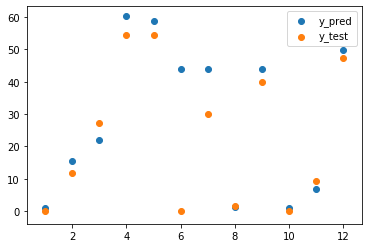

预测2025年销售额为  [[44.012]]


In [18]:
X = saledf[['Year']]
y = saledf[['Other_Sales']]
sales_predict(X, y)

### 对全球电子游戏销售额的预测性能及2025年销售额预测值

均方差MSE:  135.07436112872546
R2决定系数:  0.47663523142539954


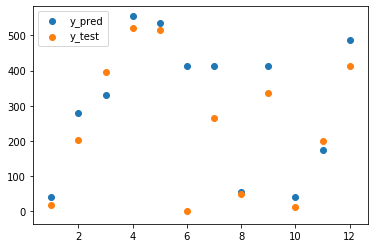

预测2025年销售额为  [[414.018]]


In [19]:
X = saledf[['Year']]
y = saledf[['Global_Sales']]
sales_predict(X, y)

从不同地区电子游戏销售额折线图可以看出，不同地区的销售额趋势走向大体一致。从1980年销售额一路走高到2008年，全球销售额一度高达678，但是之后的销售额一路下跌，且下跌程度较为距离，可能是由于2008年金融危机造成的行业动荡。2012年后销售额下降幅度放缓，由于数据的缺失，导致展示出来的最近几年的销售额较小。为了实现对每年电子游戏销售额的预测，这里使用了k近邻回归对每年的销售额进行了预测。从散点图可以看出预测结果与实际销售额走势大体相同，预测得到的销售额较为准确。